In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
random.seed(100)

In [2]:
def make_deck(cards):
    new_deck = []
    for card in cards:
        for i in range(4):
            new_deck.append(card)
    random.shuffle(new_deck)
    return new_deck

In [3]:
def get_hand_value(hand, cards):
    total = 0
    for card in hand:
        total += cards[card]
    return total

In [4]:
def get_hand(deck):
    hand = []
    for i in range(2):
        hand.append(deck.pop(0))
    return hand

In [5]:
def get_player_decision(cards, dealer_card, player_hand, strategy):
    player_value = get_hand_value(player_hand, cards)
    if player_value > 21:
        return "bust"
    
    soft_hand = False
    if len(player_hand) > 1:
        if (player_hand[0] == 11 or player_hand[1] == 11) and player_value < 21:
            soft_hand = True
    
    # Player make decision based on first dealer card and chosen strategy
    if strategy == "ultrabasic":
        if cards[dealer_card] < 7:
            return "stand"
        else:
            return "hit"
    if strategy == "basic":
        # Default is to stand unless one of the hit conditions is met
        if soft_hand:
            player_value -= 10
            return "hit"
        elif cards[dealer_card] >= 7 and player_value < 17:
            return "hit"
        elif cards[dealer_card] in [4, 5, 6] and player_value > 12:
            return "stand"
        elif cards[dealer_card] in [2, 3] and player_value > 13:
            return "stand"
        elif player_value < 17:
            return "hit"
    return "stand"

In [6]:
def run_game(cards):
    results = []
    new_deck = make_deck(cards)
    
    # Loop only runs while there are more than 4 cards available in order to at least serve the dealer and player their cards
    while len(new_deck) >= 4:
        player_hand = get_hand(new_deck)
        dealer_hand = get_hand(new_deck)

        player_value = get_hand_value(player_hand, cards)
        dealer_value = get_hand_value(dealer_hand, cards)
        
        # Split decision handled first
        if player_hand[0] == player_hand[1]:
            player_hand.pop(0)
        
        # First player decision retrieved
        player_decision = get_player_decision(cards, dealer_hand[0], player_hand, "basic")
        
        # loop player decisions to hit/stand until they either stand or bust
        while(True):
            if player_decision == "stand":
                break
            if player_decision == "bust":
                break
            if player_decision == "hit":
                if len(new_deck) < 1:
                    return results
                else:
                    player_hand.append(new_deck.pop(0))
                    player_decision = get_player_decision(cards, dealer_hand[0], player_hand, "basic")

        # Dealer play to >= 17
        while dealer_value < 17:
            if len(new_deck) < 1:
                return results
            else:
                dealer_hand.append(new_deck.pop(0))
                dealer_value = get_hand_value(dealer_hand, cards)

        # Final comparison
        player_value = get_hand_value(player_hand, cards)
        if player_value > 21:
            # Player has bust
            results.append([-1, dealer_hand[0]])
        elif dealer_value <= 21 and player_value <= 21:
            if player_value == 21 and dealer_value < 21:
                # Player wins by natural
                results.append([1, dealer_hand[0]])
            elif player_value > dealer_value:
                # Player has won by comparison
                results.append([1, dealer_hand[0]])
            elif player_value == dealer_value:
                # Tie - no money exchanged
                results.append([0, dealer_hand[0]])
            else:
                # Player has lost
                results.append([-1, dealer_hand[0]])
        elif dealer_value == 21 and player_value < 21:
            # Dealer wins by natural
            results.append([-1, dealer_hand[0]])
        elif dealer_value > 21:
            # Player has won by dealer bust
            results.append([1, dealer_hand[0]])
    return results

In [7]:
def simulate_games(cards):
    # run games
    overall_results = []
    runs = 100000
    for i in range(runs):
        overall_results.extend(run_game(cards))
    
    

In [8]:
def simulate_card_wins(cards):
    overall_results = []
    runs = 100000
    for i in range(runs):
        overall_results.extend(run_game(cards))
    
    return overall_results

In [9]:
cards = {"Ace": 11, "Two": 2, "Three": 3, "Four": 4, "Five": 5, "Six": 6, "Seven": 7, "Eight": 8, "Nine": 9, "Ten": 10, "Jack": 10, "Queen": 10, "King": 10}
df = pd.DataFrame(columns=['Win%', 'Loss%', 'Tie%', 'rounds_played'], index=[0,1,2,3,4])

for i in range(5):
    df.loc[i] = simulate_games(cards)
    
df

,Win%,Loss%,Tie%,rounds_played
0,0.431243,0.484456,0.0843011,900534
1,0.431074,0.484368,0.0845581,900339
2,0.430873,0.48493,0.0841964,900680
3,0.430147,0.484832,0.0850212,900364
4,0.432416,0.483976,0.0836077,900396


In [10]:
df2 = pd.DataFrame(simulate_card_wins(cards), columns=["Result", "Dealer_First_Card"])

In [11]:
df3 = df2.groupby(["Dealer_First_Card", "Result"]).size().reset_index(name='counts')
df3

,Dealer_First_Card,Result,counts
0,Ace,-1,41336
1,Ace,0,6700
2,Ace,1,21004
3,Eight,-1,32687
4,Eight,0,6806
5,Eight,1,30369
6,Five,-1,26144
7,Five,0,3759
8,Five,1,39524
9,Four,-1,27379


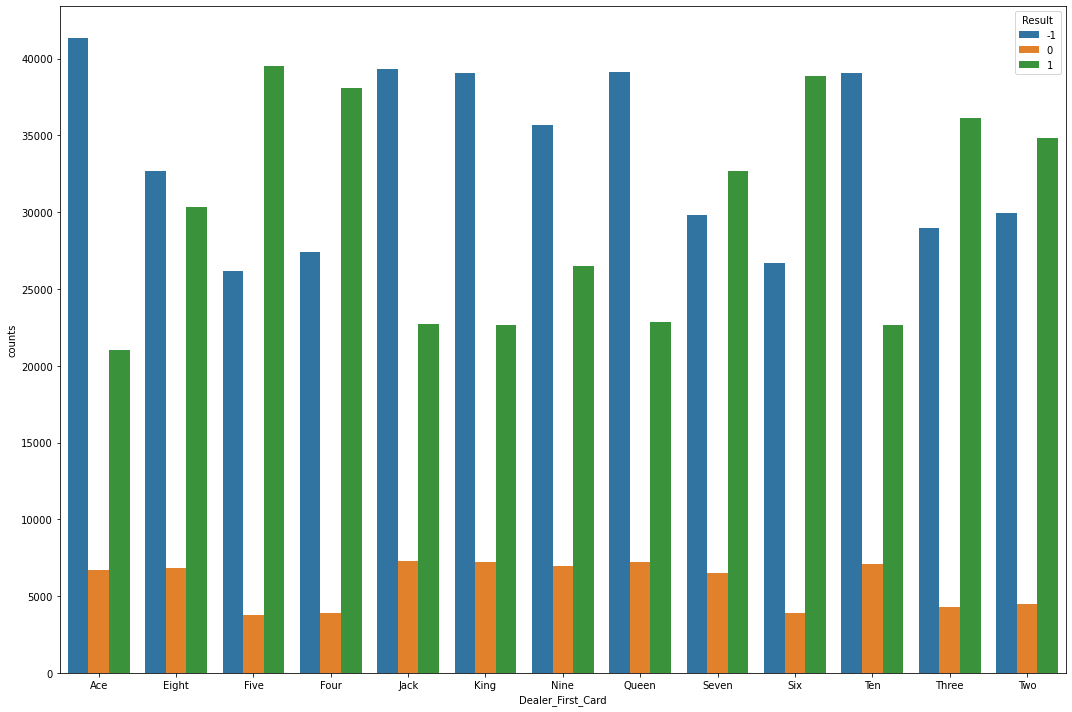

In [12]:
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.barplot(x=df3["Dealer_First_Card"], 
                 y=df3["counts"], hue=df3["Result"])
plt.tight_layout()